In [ ]:
!pip install qiskit pylatexenc

In [ ]:
!pip install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import random
import numpy as np
from qiskit.result import marginal_counts

In [ ]:
def create_registers():
    greg = QuantumRegister(1, 'greg (hawaii)')
    amy_greg_q = QuantumRegister(1, 'amy:greg (modesto, california)')
    amy_lia_q = QuantumRegister(1, 'amy:lia (modesto, california)')
    lia = QuantumRegister(1, 'lia (oxford, uk)')
    bits = ClassicalRegister(4, 'measurements')
    circ = QuantumCircuit(greg, amy_greg_q, amy_lia_q, lia, bits)
    return circ

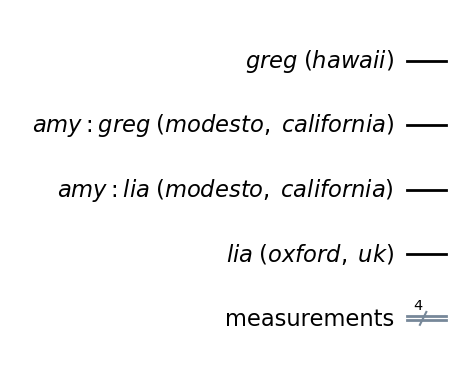

In [ ]:
create_registers().draw(output='mpl')

In [ ]:
def add_gates(circ):
    circ.barrier()
    circ.h(0)
    circ.cx(0, 1)
    circ.h(3)
    circ.cx(3, 2)
    circ.barrier()
    circ.cx(1, 2)
    circ.h(1)
    circ.barrier()
    circ.measure(1, 1)
    circ.measure(2, 2)
    with circ.if_test((1, 1)): circ.z(0)
    with circ.if_test((2, 1)): circ.x(3)
    circ.measure(0, 0)
    circ.measure(3, 3)
    return circ

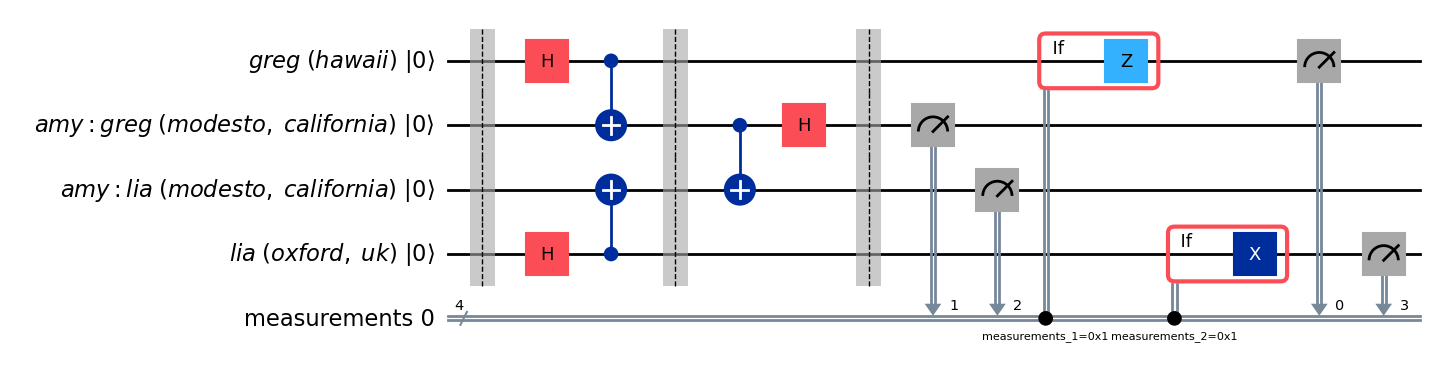

In [ ]:
circ = add_gates(create_registers())
circ.draw(output='mpl', initial_state=True)

In [ ]:
device = AerSimulator()

62910fe8-594e-4fe5-9dca-7f7d343a8318
{'11': 501, '00': 499}


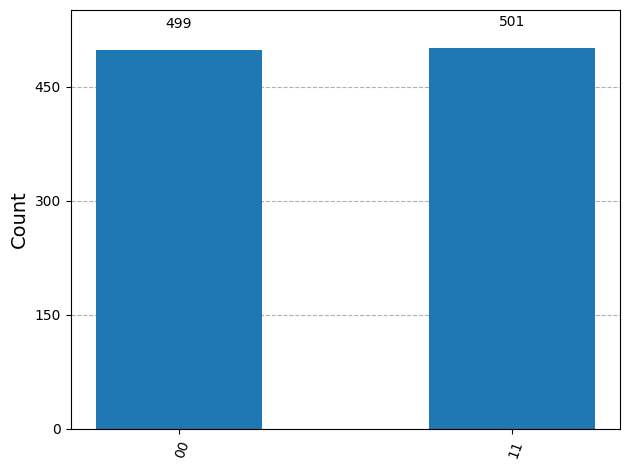

In [ ]:
from qiskit.visualization import plot_histogram
shots = 1000
job = device.run(circ, shots = shots)
print(job.job_id())
result = job.result()
counts = result.get_counts(circ)
counts_m = marginal_counts(counts, [0, 3])
print(counts_m)
display(plot_histogram(counts_m))